In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Datasource\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [30]:
df.drop(['ID'],inplace=True,axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [32]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

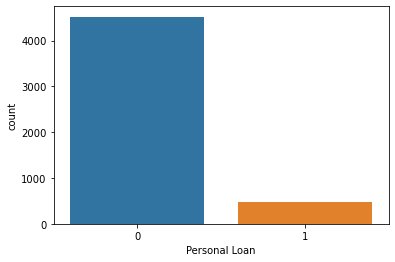

In [33]:
sns.countplot(x='Personal Loan',data=df)

In [34]:
df['Age'] = pd.cut(df['Age'],bins=[23,30,45,67],labels=['Young','Adult','Old'])

In [35]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,Young,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,Adult,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,Adult,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,Adult,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,Adult,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
df['Age'].value_counts()

Old      2481
Adult    1895
Young     612
Name: Age, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

In [38]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [39]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

In [40]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

keras = Sequential()
keras.add(Dense(12,input_dim=12,activation='relu'))
keras.add(Dense(8,activation='relu'))
keras.add(Dense(6,activation='relu'))

In [43]:
keras.add(Dense(1,activation='sigmoid'))

In [44]:
keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
keras.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
150/150 [==============================] - 3s 3ms/step - loss: 1453.2344 - accuracy: 0.7160
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 13.5173 - accuracy: 0.8261
Epoch 3/20
150/150 [==============================] - 1s 4ms/step - loss: 11.0972 - accuracy: 0.8229
Epoch 4/20
150/150 [==============================] - 0s 3ms/step - loss: 20.1661 - accuracy: 0.8349
Epoch 5/20
150/150 [==============================] - 0s 3ms/step - loss: 10.1140 - accuracy: 0.8352
Epoch 6/20
150/150 [==============================] - 0s 3ms/step - loss: 10.3571 - accuracy: 0.8384
Epoch 7/20
150/150 [==============================] - 1s 4ms/step - loss: 8.8561 - accuracy: 0.8365
Epoch 8/20
150/150 [==============================] - 1s 4ms/step - loss: 9.1444 - accuracy: 0.8331
Epoch 9/20
150/150 [==============================] - 0s 3ms/step - loss: 6.3451 - accuracy: 0.8632
Epoch 10/20
150/150 [==============================] - 0s 3ms/step - loss: 7.9090 - accuracy

In [46]:
_,acc = keras.evaluate(x_train,y_train)
print(acc*100)

118/118 [==============================] - 1s 4ms/step - loss: 3.9434 - accuracy: 0.9043
90.42666554450989


In [47]:
y_pred = keras.predict(x_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 2ms/step


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9016

In [49]:
from keras import backend as K
def r_loss(y_test,y_pred):
    res=K.sum(K.square(y_test-y_pred))    
    total=K.sum(K.square(y_test-K.mean(y_test)))
    return 1-(1-res/(total+K.epsilon()))

## Cultural Algorithm

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.random.randn(self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.random.randn(self.output_size)
        
    def forward(self, X):
        # Compute the output of the neural network for the given input X
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.y_hat = np.exp(self.z2) / np.sum(np.exp(self.z2), axis=1, keepdims=True)
        
        return self.y_hat
    
class CulturalAlgorithm:
    def __init__(self, population_size, num_generations, mutation_rate, input_size, hidden_size, output_size):
        self.population_size = population_size
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize the population
        self.population = [NeuralNetwork(self.input_size, self.hidden_size, self.output_size) for i in range(self.population_size)]
        
    def select_parents(self):
        # Select two parents using tournament selection
        parent1, parent2 = None, None
        for i in range(2):
            tournament = np.random.choice(self.population, size=4)
            winner = tournament[0]
            for j in range(1, 4):
                if tournament[j].fitness > winner.fitness:
                    winner = tournament[j]
            if i == 0:
                parent1 = winner
            else:
                parent2 = winner
        return parent1, parent2
    
    def crossover(self, parent1, parent2):
        # Perform uniform crossover
        child = NeuralNetwork(self.input_size, self.hidden_size, self.output_size)
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                if np.random.rand() < 0.5:
                    child.weights1[i][j] = parent1.weights1[i][j]
                else:
                    child.weights1[i][j] = parent2.weights1[i][j]
        for i in range(self.hidden_size):
            for j in range(self.output_size):
                if np.random.rand() < 0.5:
                    child.weights2[i][j] = parent1.weights2[i][j]
                else:
                    child.weights2[i][j] = parent2.weights2[i][j]
        return child
    
    def mutate(self, child):
        # Mutate the child with a given mutation rate
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                if np.random.rand() < self.mutation_rate:
                    child.weights1[i][j] += np.random.normal(scale=0.1)
        for i in range(self.hidden_size):
            for j in range(self.output_size):
                if np.random.rand() < self.mutation_rate:
                    child.weights2[i][j] += np.random.normal(scale=0.1)
        return child